# Stimulation example

This notebook will give you a simple example of how to construct a stimulus and apply it as an input current to the excitatory population of the `aln` model.

In [2]:
# change to the root directory of the project
import os
if os.getcwd().split("/")[-1] in ["examples", "dev"]:
    os.chdir('..')
    
# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2    

In [3]:
try:
    import matplotlib.pyplot as plt
except ImportError:
    import sys
    !{sys.executable} -m pip install matplotlib
    import matplotlib.pyplot as plt
    
import numpy as np
import scipy

# Let's import the aln model
from neurolib.models.aln import ALNModel

# Some useful functions are provided here
import neurolib.utils.functions as func

First, we initialize a single node.

In [9]:
model = ALNModel()
model.params['duration'] = 5 * 1000
model.params['sigma_ou'] = 0.2 # we add some noise

We can construct a simple stimulus using the function `func.construct_stimulus`:

In [10]:
stimulus = func.construct_stimulus("rect", duration=model.params.duration, dt=model.params.dt, stim_amp=1.0, stim_freq=1)

In [11]:
stimulus = func.construct_stimulus("ac", duration=model.params.duration, dt=model.params.dt, stim_amp=1.0, stim_freq=1)

The stimulus is then set as an input current parameter to the model. The parameter that models a current that goes to the excitatory population is called `ext_exc_current`. For the inhibitory population, we can use `etc_inh_current`. We can also set a firing rate input, that will then be integrated over the synapses using the parameter `model.params['ext_exc_rate']`.

In [12]:
model.params['ext_exc_current'] = stimulus
model.run()

When we plot the timeseries, we can see that the oscillatory activity locks to the stimulus.

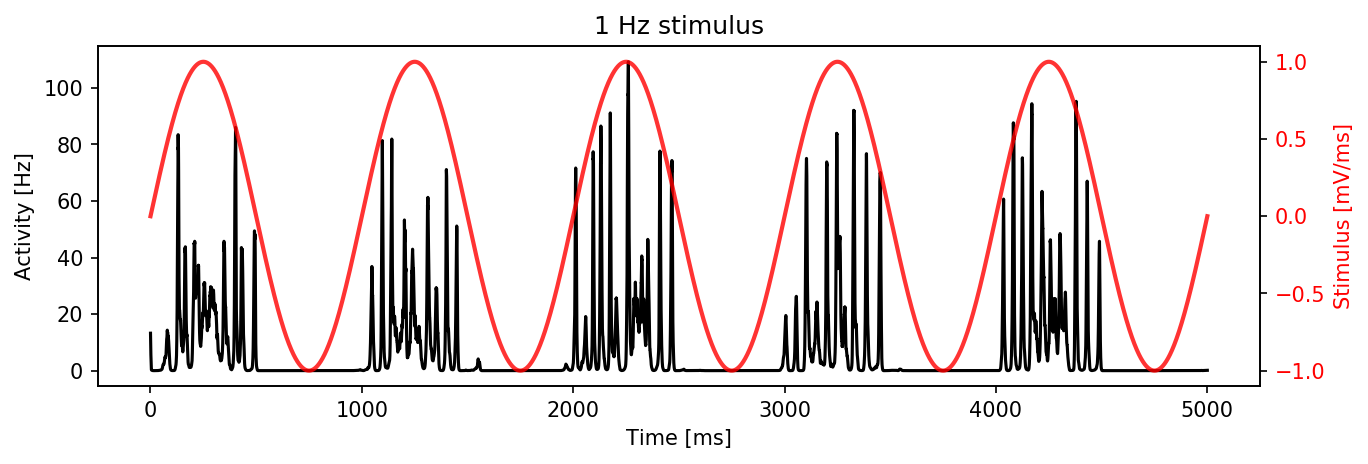

In [13]:
plt.figure(figsize=(10, 3), dpi=150)
plt.title("1 Hz stimulus")
ax1 = plt.gca()
ax1.plot(model.t, model.output.T, c="k")
ax2 = plt.gca().twinx()
ax2.plot(model.t, stimulus, lw=2, c="r", alpha=0.8)
ax1.set_xlabel("Time [ms]")
ax1.set_ylabel("Activity [Hz]")
ax2.set_ylabel("Stimulus [mV/ms]", color='r')
ax2.set_ylabel("Stimulus [mV/ms]", color='r')
ax2.tick_params(axis='y', labelcolor='r')